# k-Nearest Neighbour (k-NN Algorithm)

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Import the dataset
dataset = pd.read_csv('D:\Test\D9data2.csv')
dataset

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [6]:
dataset.shape

(400, 4)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [8]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [19]:
#Independent variable
X=dataset.iloc[:,1:-1].values

#Dependent variable
y=dataset.iloc[:,-1].values

In [20]:
#Splitting of training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [22]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [24]:
X_test

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674],
       [-0.77184498, -1.52502632],
       [-0.40429975, -1.68064126],
       [ 0.05513178,  2.33422397],
       [-1.59882175, -0.03112299],
       [ 1.06588117, -0.80919764],
       [-0.49618606, -0.62245972],
       [-0.67995868, -0.43572181],
       [ 0.14701809, -0.43572181],
       [ 0.33079071,  0.24898389],
       [-1.41504914,  0.52909077],
       [-0.31241345,  1.49390334],
       [ 0.14701809,  0.24898389],
       [-1.50693545,  0.49796778],
       [ 1.80097163,  1.89850216],
       [-0.03675452, -1.46278035],
       [-0.03675452, -0.6847057 ],
       [ 1.06588117,  2.33422397],
       [ 0.51456332, -0.56021375],
       [ 1.06588117,  1.1204275 ],
       [-1.13939022, -1.27604243],
       [ 1.24965379,  2.24085501],
       [-0.67995868,  0.56021375],
       [-0.58807237,  0.34235285],
       [ 0.14701809,

In [25]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
#Prediction
classifier.predict(sc.transform([[10,9000]]))

array([0], dtype=int64)

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [33]:
#Model Evalaution
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))

[[54  1]
 [ 4 21]]


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.84      0.89        25

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



In [35]:
print(accuracy_score(y_pred,y_test))

0.9375


C:\Users\DELL\AppData\Local\Temp\ipykernel_32052\3282701648.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


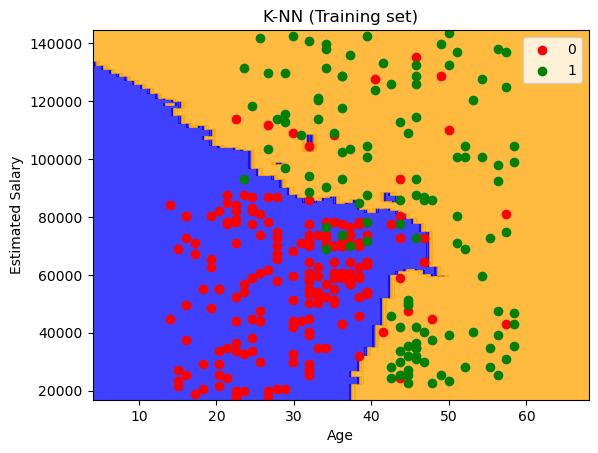

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
